5. Data Analytics using Python

5.1. Handle the given dataset (Data.csv) with adequate preprocessing steps
mentioned and visualize the dataset with appropriate graphs.
    5.1.1. Handle Missing Data Values
    5.1.2. Encode the categorical data
    5.1.3. Scale your features

Step 1 :Import 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

Step 2 : Load the dataset

In [27]:
data = pd.read_csv('Data.csv')
print(data.head())

     Country   Age   Salary Purchased
0      India  34.0  92000.0       Yes
1  Sri lanka  22.0  25000.0       Yes
2      China  31.0  74000.0       Yes
3  Sri lanka  29.0      NaN        No
4      China  55.0  98000.0       Yes


Step 3 : Handle Missing data

In [28]:
#Check for Missig values 
print(data.isnull().sum())

#Age and Salary has missing values
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Salary'] = data['Salary'].fillna(data['Salary'].mean())

print("\nDataset after Handling missing values : \n",data)

#Verify Missing values
print(data.isnull().sum())

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

Dataset after Handling missing values : 
       Country        Age        Salary Purchased
0       India  34.000000  92000.000000       Yes
1   Sri lanka  22.000000  25000.000000       Yes
2       China  31.000000  74000.000000       Yes
3   Sri lanka  29.000000  54857.142857        No
4       China  55.000000  98000.000000       Yes
5       India  24.000000  30000.000000        No
6   Sri lanka  28.000000  40000.000000        No
7       India  33.714286  60000.000000        No
8       China  51.000000  89000.000000       Yes
9       India  44.000000  78000.000000       Yes
10  Sri lanka  21.000000  20000.000000        No
11      China  25.000000  30000.000000       Yes
12      India  33.000000  45000.000000       Yes
13      India  42.000000  65000.000000       Yes
14  Sri lanka  33.000000  22000.000000        No
Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


Step 4 : Encode Categorical Data

In [29]:
#Use LabelEncoder for Single categorical column
label_encoder = LabelEncoder()

#Encoding "Purchased" (Yes/No) into (1/0)
data['Purchased'] = label_encoder.fit_transform(data['Purchased'])

#Encoding "Country" using OneHotEncoding(Creates seperate columns for each category)
data = pd.get_dummies(data,columns = ['Country'],drop_first = True) # drop_first to avoid dummy variable trap

print("\nDataset after encoding categorical variables:\n",data)


Dataset after encoding categorical variables:
           Age        Salary  Purchased  Country_India  Country_Sri lanka
0   34.000000  92000.000000          1           True              False
1   22.000000  25000.000000          1          False               True
2   31.000000  74000.000000          1          False              False
3   29.000000  54857.142857          0          False               True
4   55.000000  98000.000000          1          False              False
5   24.000000  30000.000000          0           True              False
6   28.000000  40000.000000          0          False               True
7   33.714286  60000.000000          0           True              False
8   51.000000  89000.000000          1          False              False
9   44.000000  78000.000000          1           True              False
10  21.000000  20000.000000          0          False               True
11  25.000000  30000.000000          1          False              False
12 

Step 5 : Scale Your features

In [30]:
#Initialize StandardScaler()
scaler = StandardScaler()

#Select numerical columns to scale - Age and Salary
numerical_cols = ['Age','Salary']

#Apply Scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nDataset After Scaling features : \n",data)



Dataset After Scaling features : 
          Age    Salary  Purchased  Country_India  Country_Sri lanka
0   0.028972  1.425922          1           True              False
1  -1.187832 -1.146222          1          False               True
2  -0.275229  0.734898          1          False              False
3  -0.478030  0.000000          0          False               True
4   2.158378  1.656263          1          False              False
5  -0.985032 -0.954271          0           True              False
6  -0.579430 -0.570369          0          False               True
7   0.000000  0.197435          0           True              False
8   1.752777  1.310751          1          False              False
9   1.042975  0.888459          1           True              False
10 -1.289232 -1.338173          0          False               True
11 -0.883631 -0.954271          1          False              False
12 -0.072429 -0.378418          1           True              False
13  0.840174

Step 6: Visualization

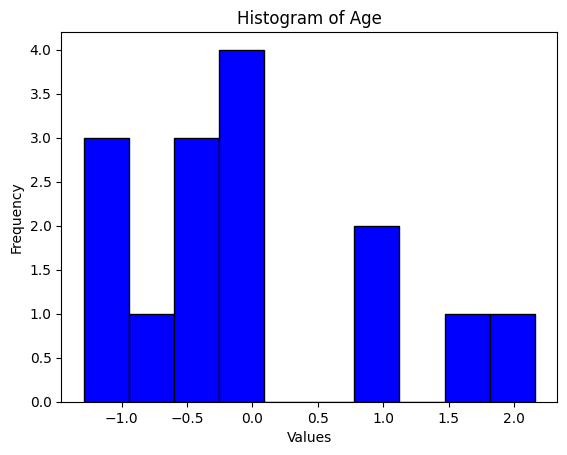

In [41]:
plt.hist(data['Age'],bins = 10 , color = 'blue' , edgecolor = 'black')
plt.title('Histogram of Age')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show();

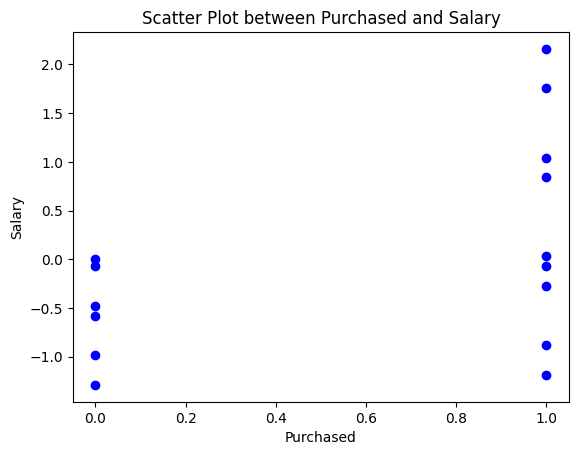

In [38]:
plt.scatter(data['Purchased'],data['Salary'],color='blue',edgecolor='red)
plt.title('Scatter Plot between Purchased and Salary')
plt.xlabel('Purchased')
plt.ylabel('Salary')
plt.show()

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Purchased',data=data)
plt.title('Count of Purchases (Yes/No)')
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Purchased', y='Salary', hue='Country_India', data=data)
plt.title('Country-wise Salary of Purchasers')
plt.show()

5.2. Using the given dataset (dirtydata.csv),
    5.2.1. Handle the data with empty cells (Use dropna() and fillna())
    5.2.2. Replace the empty cells using mean, median, and mode.
    5.2.3. Handle the data in the wrong format.
    5.2.4. Handle the wrong data from the dataset.
    5.2.5. Discover and remove duplicates

In [86]:
#Step 1 :Import 
import pandas as pd
import numpy as np


In [116]:
#Step 2 : Load data
data = pd.read_csv('dirtydata.csv')
print(data)

    Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020/12/01'    110       130     409.1
1         60  '2020/12/02'    117       145     479.0
2         60  '2020/12/03'    103       135     340.0
3         45  '2020/12/04'    109       175     282.4
4         45  '2020/12/05'    117       148     406.0
5         60  '2020/12/06'    102       127     300.0
6         60  '2020/12/07'    110       136     374.0
7        450  '2020/12/08'    104       134     253.3
8         30  '2020/12/09'    109       133     195.1
9         60  '2020/12/10'     98       124     269.0
10        60  '2020/12/11'    103       147     329.3
11        60  '2020/12/12'    100       120     250.7
12        60  '2020/12/12'    100       120     250.7
13        60  '2020/12/13'    106       128     345.3
14        60  '2020/12/14'    104       132     379.3
15        60  '2020/12/15'     98       123     275.0
16        60  '2020/12/16'     98       120     215.2
17        60  '2020/12/17'  

In [117]:
#Step 3 : Handle data with empty cells

#Use dropna()-to drop rows with missing values
data_dropped = data.dropna()
print("\nDataset after dropping rows with missing values :\n",data_dropped)

#Use fillna() 
data_filled = data.fillna('Unknown')
print("\nDataset after filling missing values with 'Unknown':\n",data_filled)



Dataset after dropping rows with missing values :
     Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020/12/01'    110       130     409.1
1         60  '2020/12/02'    117       145     479.0
2         60  '2020/12/03'    103       135     340.0
3         45  '2020/12/04'    109       175     282.4
4         45  '2020/12/05'    117       148     406.0
5         60  '2020/12/06'    102       127     300.0
6         60  '2020/12/07'    110       136     374.0
7        450  '2020/12/08'    104       134     253.3
8         30  '2020/12/09'    109       133     195.1
9         60  '2020/12/10'     98       124     269.0
10        60  '2020/12/11'    103       147     329.3
11        60  '2020/12/12'    100       120     250.7
12        60  '2020/12/12'    100       120     250.7
13        60  '2020/12/13'    106       128     345.3
14        60  '2020/12/14'    104       132     379.3
15        60  '2020/12/15'     98       123     275.0
16        60  '2020/12/16'    

In [118]:
#Step 4 : Replace the empty cells with Mean,Median and Mode

#check for empty cells
print(data.isnull().sum())

#Here we have missing values for  "Date" and "Calories" columns 
#Filling Missing "Date" using forward fill (ffill) -which copies the previous valid date to fill the missing one
data['Date']=data['Date'].fillna(data['Date'].ffill())

#Fill Missing "Calories" using mean
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())


print("\nDataset After Filling Miissing Values : \n\n",data)


Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

Dataset After Filling Miissing Values : 

     Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020/12/01'    110       130    409.10
1         60  '2020/12/02'    117       145    479.00
2         60  '2020/12/03'    103       135    340.00
3         45  '2020/12/04'    109       175    282.40
4         45  '2020/12/05'    117       148    406.00
5         60  '2020/12/06'    102       127    300.00
6         60  '2020/12/07'    110       136    374.00
7        450  '2020/12/08'    104       134    253.30
8         30  '2020/12/09'    109       133    195.10
9         60  '2020/12/10'     98       124    269.00
10        60  '2020/12/11'    103       147    329.30
11        60  '2020/12/12'    100       120    250.70
12        60  '2020/12/12'    100       120    250.70
13        60  '2020/12/13'    106       128    345.30
14        60  '2020/12/14'    104       132    379.30
15       

In [119]:
#Step 5 : Handle the data in Wrong Format

#Here "Date" column has an incorrectly formatted value (20201226).
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')

print("\nData after Handling wrong date format : \n\n",data)


Data after Handling wrong date format : 

     Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130    409.10
1         60 2020-12-02    117       145    479.00
2         60 2020-12-03    103       135    340.00
3         45 2020-12-04    109       175    282.40
4         45 2020-12-05    117       148    406.00
5         60 2020-12-06    102       127    300.00
6         60 2020-12-07    110       136    374.00
7        450 2020-12-08    104       134    253.30
8         30 2020-12-09    109       133    195.10
9         60 2020-12-10     98       124    269.00
10        60 2020-12-11    103       147    329.30
11        60 2020-12-12    100       120    250.70
12        60 2020-12-12    100       120    250.70
13        60 2020-12-13    106       128    345.30
14        60 2020-12-14    104       132    379.30
15        60 2020-12-15     98       123    275.00
16        60 2020-12-16     98       120    215.20
17        60 2020-12-17    100       1

In [120]:
#Step 6 : Handle the Wrong data from the dataset

#The value 450 in the "Duration" column seems abnormally high compared to other values.
#Assuming 450 is 45 so replace it:

data['Duration'] = data['Duration'].replace(450,45)

print("\n",data)





     Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130    409.10
1         60 2020-12-02    117       145    479.00
2         60 2020-12-03    103       135    340.00
3         45 2020-12-04    109       175    282.40
4         45 2020-12-05    117       148    406.00
5         60 2020-12-06    102       127    300.00
6         60 2020-12-07    110       136    374.00
7         45 2020-12-08    104       134    253.30
8         30 2020-12-09    109       133    195.10
9         60 2020-12-10     98       124    269.00
10        60 2020-12-11    103       147    329.30
11        60 2020-12-12    100       120    250.70
12        60 2020-12-12    100       120    250.70
13        60 2020-12-13    106       128    345.30
14        60 2020-12-14    104       132    379.30
15        60 2020-12-15     98       123    275.00
16        60 2020-12-16     98       120    215.20
17        60 2020-12-17    100       120    300.00
18        45 2020-12-18     9

In [123]:
#Step 7 : Discover and remove duplicates

#Discovering duplicates
duplicates = data.duplicated()
print(duplicates)

#Discovered there is duplicate value in 12th row
#Removing  duplicates
data_dup_removed = data.drop_duplicates()

print(data_dup_removed)



0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool
    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130    409.10
1         60 2020-12-02    117       145    479.00
2         60 2020-12-03    103       135    340.00
3         45 2020-12-04    109       175    282.40
4         45 2020-12-05    117       148    406.00
5         60 2020-12-06    102       127    300.00
6         60 2020-12-07    110       136    374.00
7         45 2020-12-08    104       134    253.30
8         30 2020-12-09    109       133    195.10
9         60 2020-12-10     98       124    269.00
10        60 2020-12-11    103       147   

In [122]:
print(data)

    Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130    409.10
1         60 2020-12-02    117       145    479.00
2         60 2020-12-03    103       135    340.00
3         45 2020-12-04    109       175    282.40
4         45 2020-12-05    117       148    406.00
5         60 2020-12-06    102       127    300.00
6         60 2020-12-07    110       136    374.00
7         45 2020-12-08    104       134    253.30
8         30 2020-12-09    109       133    195.10
9         60 2020-12-10     98       124    269.00
10        60 2020-12-11    103       147    329.30
11        60 2020-12-12    100       120    250.70
12        60 2020-12-12    100       120    250.70
13        60 2020-12-13    106       128    345.30
14        60 2020-12-14    104       132    379.30
15        60 2020-12-15     98       123    275.00
16        60 2020-12-16     98       120    215.20
17        60 2020-12-17    100       120    300.00
18        45 2020-12-18     90 

5.3. Create a cricketer dataset using a dictionary of lists, and create a new
attribute ‘Experience Category’ using ‘Age’ as the binning factor.

In [124]:
#Step 1 : Import
import pandas as pd

In [128]:
#Step 2 : Create cricketer Dataset using dictionary of lists

#Create Dictionary:
data = {
    'Name' : ['Virat Kohli','Rohit Sharma','MS Shoni','Sachin Tendulkar','Hardik Pandya','Ravindra Jadeja','Shubman Gill','Rishabh Pant','Yuvaraj Singh'],
    'Age':[34, 36, 39, 47, 28, 32, 24, 26, 41],
    'Runs': [12000, 10000, 10500, 18426, 3500, 2400, 1800, 2500, 8700],
    'Wickets': [4, 8, 1, 154, 55, 185, 0, 0, 111],
    'Matches': [250, 200, 350, 463, 80, 100, 30, 50, 300]
}

#Convert the Dictionary to pandas DataFrame:
cricketer_df = pd.DataFrame(data)

print("\nCricketer Database : \n\n",cricketer_df)


Cricketer Database : 

                Name  Age   Runs  Wickets  Matches
0       Virat Kohli   34  12000        4      250
1      Rohit Sharma   36  10000        8      200
2          MS Shoni   39  10500        1      350
3  Sachin Tendulkar   47  18426      154      463
4     Hardik Pandya   28   3500       55       80
5   Ravindra Jadeja   32   2400      185      100
6      Shubman Gill   24   1800        0       30
7      Rishabh Pant   26   2500        0       50
8     Yuvaraj Singh   41   8700      111      300


In [129]:
#Step 3 : create a new attribute ‘Experience Category’ using ‘Age’ as the binning factor

#Define Bins and Labels
bins = [0,25,35,50]
labels =['young','mid_level','experienced']

#create new attribute
cricketer_df['Experience Category']= pd.cut(cricketer_df['Age'],bins=bins,labels=labels,right=False)

print("\nCricketer Database with 'Experience Category' : \n\n",cricketer_df)


Cricketer Database with 'Experience Category' : 

                Name  Age   Runs  Wickets  Matches Experience Category
0       Virat Kohli   34  12000        4      250           mid_level
1      Rohit Sharma   36  10000        8      200         experienced
2          MS Shoni   39  10500        1      350         experienced
3  Sachin Tendulkar   47  18426      154      463         experienced
4     Hardik Pandya   28   3500       55       80           mid_level
5   Ravindra Jadeja   32   2400      185      100           mid_level
6      Shubman Gill   24   1800        0       30               young
7      Rishabh Pant   26   2500        0       50           mid_level
8     Yuvaraj Singh   41   8700      111      300         experienced


5.4. car_age = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
car_speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

Using the given dataset,
    5.4.1. Draw the line of linear regression
    5.4.2. Evaluate how well the data fit in linear regression.
    5.4.3. Predict the speed of a 10-year-old car

In [130]:
#Step 1 : import 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [133]:
#Step 2:Prepare the Dataset

#Given data
car_age = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
car_speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

#Covert to numpy arrays and Reshape for Linear Regression
X = np.array(car_age).reshape(-1,1) #Independent variable
y = np.array(car_speed) #Dependent Variable


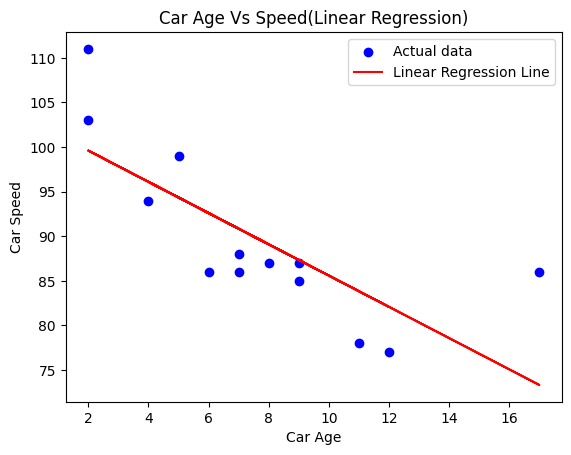

In [134]:
#Step 3 : Draw Linear Regression model

#Initialize LinearRegression Model
model = LinearRegression()

#Fit the Model
model.fit(X,y)

#Predict values for the Line of Best Fit
y_pred = model.predict(X)

#Plot the data and Line of Best Fit
plt.scatter(car_age,car_speed,color='blue',label='Actual data')
plt.plot(car_age,y_pred,color='red',label='Linear Regression Line')
plt.title('Car Age Vs Speed(Linear Regression)')
plt.xlabel('Car Age')
plt.ylabel('Car Speed')
plt.legend()
plt.show()




In [135]:
#Step 4: Evaluate how well the data fit in linear regression

#Calculate R-square
#The R-squared value tells how well the regression line fits the data.
#A value closer to 1 means a good fit.

r_squared = r2_score(y,y_pred)
print(f'R-Squared : {r_squared}')


R-Squared : 0.5754611008553381


In [147]:
#Step 5:Predict the speed of a 10-year-old car

predicted_speed = model.predict([[10]])
print(f'Predicted speeed for a 10-year old car : {predicted_speed[0]} mph')

Predicted speeed for a 10-year old car : 85.59308314937454 mph


In [ ]:
5.5. Using the dataset (cars.csv),
    5.5.1. Predict the CO2 emissions of a car with a weight of 2300 kg and
    volume of 1300 cm3.
    5.5.2. Print the coefficient values of the regression object.
        

In [149]:
#Step 1:Import
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [154]:
#Step 2:Load dataset
data = pd.read_csv('cars.csv')

print(data)

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

In [155]:
#Step 3:Prepare the data 
X = data[['Volume','Weight']] #Independent Variables
y = data['CO2'] #Dependent Variables


In [161]:
#Step 4: Create Linear Regression Model and Fit the Model
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [167]:
#Step 5: Predict CO2 emissions for a car with Volume = 1300 and Weight = 2300

# Create a DataFrame for the input with feature names
input_data = pd.DataFrame({'Volume': [1300], 'Weight': [2300]})

predicted_CO2 = model.predict(input_data)
print(f'Predicted CO2 emissions : {predicted_CO2[0]}')

Predicted CO2 emissions : 107.20873279892223


In [168]:
#Step 6 : Print the coefficient values
print(f'Coefficients : Volume = {model.coef_[0]},Weight = {model.coef_[1]}')

#print the intercept as well , if needed
print(f'intercept :{model.intercept_}')

Coefficients : Volume = 0.007805257527747128,Weight = 0.007550947270300682
intercept :79.69471929115939


**5.6. Using the insurance dataset (insurance.csv) with adequate preprocessing
steps,
    5.6.1. Visualize the correlation among variables using a heatmap.
    5.6.2. Create a linear regression model.
    5.6.3. Evaluate the model. (Find MSE and R_square.)
    5.6.4. Predict the charges for a person with an age of 30, a BMI of 32.00, and
    who is a smoker.**

In [2]:
#Step 1:Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
#Step 2:Load the dataset
data = pd.read_csv('insurance.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400        True     False      False   
1      18  33.770         1   1725.55230       False      True       True   
2      28  33.000         3   4449.46200       False      True       True   
3      33  22.705         0  21984.47061       False      True       True   
4      32  28.880         0   3866.85520       False      True       True   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830       False      True       True   
1334   18  31.920         0   2205.98080        True     False       True   
1335   18  36.850         0   1629.83350        True     False       True   
1336   21  25.800         0   2007.94500        True     False       True   
1337   61  29.070         0  29141.36030        True     False      False   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

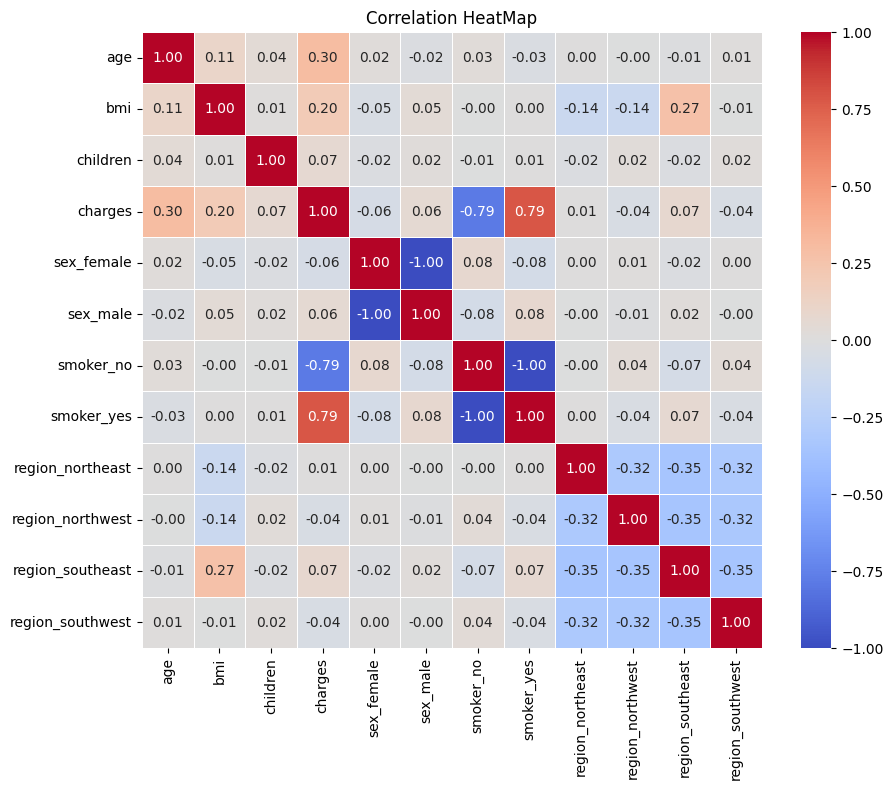

In [5]:
#Step 3 : Visualize the correlation among variables using a heatmap.

#Convert Categorical columns to numerical
df_encoded = pd.get_dummies(data)
print(df_encoded)
#Calculate the correlation matrix
corr_matrix = df_encoded.corr()

#Plot the Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True , cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation HeatMap')
plt.show()



In [179]:
#Step 4:Create a linear regression model.

#Define X and y
X = df_encoded.drop(columns=['charges']) #Features
y = df_encoded['charges'] #Target variable

#Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Create and Fit Linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

#Print Model Coefficient and Intercept
print(f'\nCoefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')



Coefficients: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]
Intercept: -574.5357125102109


In [181]:
#Step 5: Evaluate the model. (Find MSE and R_square.)

#Predict on the test set
y_pred = model.predict(X_test)

#Calculate MSE and R-squared value
mse = mean_squared_error(y_test,y_pred)
r_sqaured = r2_score(y_test,y_pred)

print(f'MSE : {mse}')
print(f'R-squared : {r_squared}')

MSE : 33596915.85136147
R-squared : 0.5754611008553381


In [183]:
#Step 6 :Predict the charges for a person with an age of 30, a BMI of 32.00, and who is a smoker.

person_data = pd.DataFrame({
    'age':[30],
    'bmi':[32],
    'children':[0],
    'sex_female':[0],
    'sex_male':[1],
    'smoker_no':[0],
    'smoker_yes':[1],
    'region_northeast':[0],
    'region_northwest':[0],
    'region_southeast':[0],
    'region_southwest':[0]
    
    
})

predicted_charges = model.predict(person_data)
print(f'Predicted Charges : ${predicted_charges[0]:,.2f}')

Predicted Charges : $29,737.97
